# KNN & PCA

1. Train a KNN Classifier on the Iris dataset and print model accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


2.  Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Initialize the KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = knn_reg.predict(X_test_reg)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 98.80


3. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model with Euclidean distance
knn_euclidean.fit(X_train, y_train)

# Make predictions and calculate accuracy with Euclidean distance
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print(f"Model Accuracy (Euclidean Distance): {accuracy_euclidean:.2f}")

# Initialize KNN classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train the model with Manhattan distance
knn_manhattan.fit(X_train, y_train)

# Make predictions and calculate accuracy with Manhattan distance
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Model Accuracy (Manhattan Distance): {accuracy_manhattan:.2f}")

Model Accuracy (Euclidean Distance): 1.00
Model Accuracy (Manhattan Distance): 1.00


4. Train a KNN Classifier with different values of K and visualize decision boundaries.

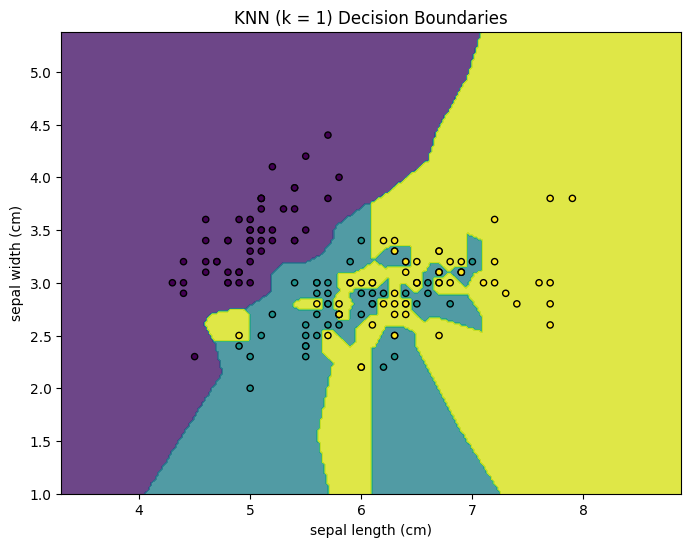

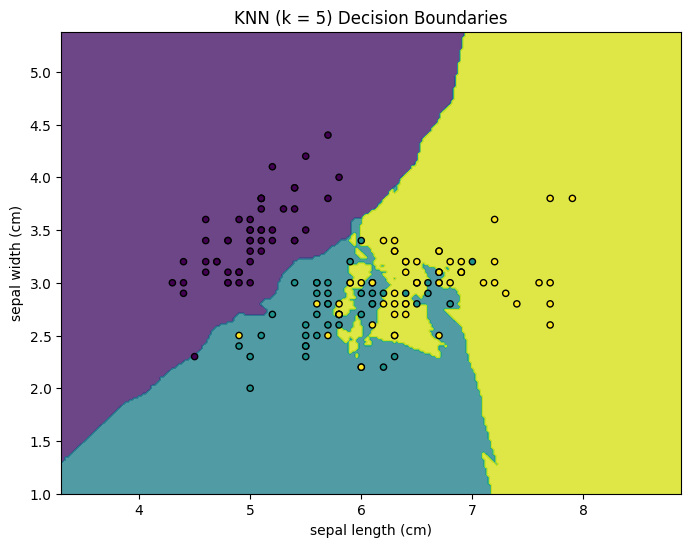

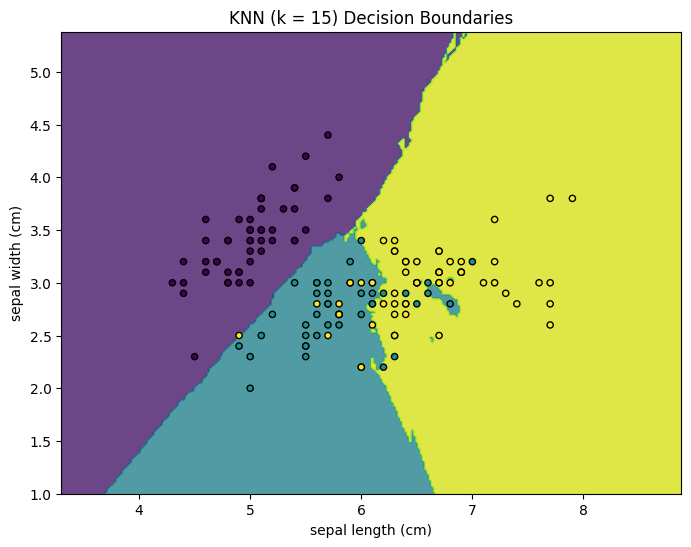

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset and select the first two features for simplicity
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Iterate through different values of K
for n_neighbors in [1, 5, 15]:
    # Initialize the KNN classifier with the current K
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model
    knn.fit(X, y)

    # Predict the class for each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title(f"KNN (k = {n_neighbors}) Decision Boundaries")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

5. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN on unscaled data
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy (Unscaled Data): {accuracy_unscaled:.2f}")

# Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy (Scaled Data): {accuracy_scaled:.2f}")

Accuracy (Unscaled Data): 1.00
Accuracy (Scaled Data): 1.00


6.  Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [6]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import numpy as np

# Generate synthetic data
X_synth, _ = make_classification(n_samples=200, n_features=10, random_state=42)

# Initialize PCA
pca = PCA()

# Train PCA model
pca.fit(X_synth)

# Print explained variance ratio for each component
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Optional: Print cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio:")
for i, cum_ratio in enumerate(cumulative_variance):
    print(f"Principal Component {i+1}: {cum_ratio:.4f}")

Explained Variance Ratio for each component:
Principal Component 1: 0.2547
Principal Component 2: 0.1792
Principal Component 3: 0.1285
Principal Component 4: 0.1129
Principal Component 5: 0.0950
Principal Component 6: 0.0858
Principal Component 7: 0.0781
Principal Component 8: 0.0658
Principal Component 9: 0.0000
Principal Component 10: 0.0000

Cumulative Explained Variance Ratio:
Principal Component 1: 0.2547
Principal Component 2: 0.4339
Principal Component 3: 0.5624
Principal Component 4: 0.6753
Principal Component 5: 0.7703
Principal Component 6: 0.8561
Principal Component 7: 0.9342
Principal Component 8: 1.0000
Principal Component 9: 1.0000
Principal Component 10: 1.0000


7.  Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- KNN without PCA ---
# Initialize and train KNN classifier on original data
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_no_pca = knn_no_pca.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy (without PCA): {accuracy_no_pca:.2f}")

# --- KNN with PCA ---
# Standardize the data before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (choose number of components, e.g., 2 for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train KNN classifier on PCA-transformed data
knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca, y_train)

# Make predictions and calculate accuracy
y_pred_with_pca = knn_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
print(f"Accuracy (with PCA): {accuracy_with_pca:.2f}")

Accuracy (without PCA): 1.00
Accuracy (with PCA): 0.96


8. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21),  # Test k from 1 to 20
              'metric': ['euclidean', 'manhattan', 'minkowski']} # Test different distance metrics

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) # 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Test set accuracy with best parameters: {test_accuracy:.2f}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(3)}
Best cross-validation accuracy: 0.94
Test set accuracy with best parameters: 1.00


9. Train a KNN Classifier and check the number of misclassified samples.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the number of misclassified samples
# The number of correctly classified samples is accuracy * total samples
# The number of misclassified samples is total samples - correctly classified samples
num_misclassified = len(y_test) - accuracy_score(y_test, y_pred, normalize=False)

print(f"Number of misclassified samples: {num_misclassified}")

Number of misclassified samples: 0.0


10.  Train a PCA model and visualize the cumulative explained variance.

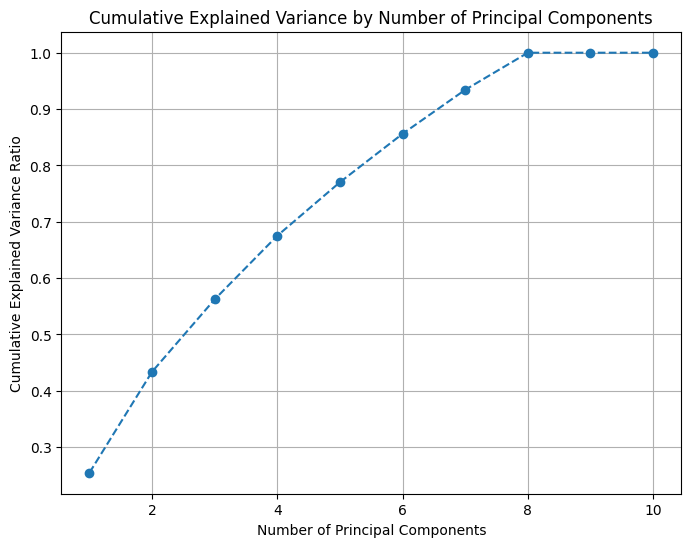

In [10]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X_synth, _ = make_classification(n_samples=200, n_features=10, random_state=42)

# Initialize PCA
pca = PCA()

# Train PCA model
pca.fit(X_synth)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualize cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

11. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare
accuracy.

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')

# Train the model with uniform weights
knn_uniform.fit(X_train, y_train)

# Make predictions and calculate accuracy with uniform weights
y_pred_uniform = knn_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
print(f"Model Accuracy (Uniform Weights): {accuracy_uniform:.2f}")

# Initialize KNN classifier with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train the model with distance weights
knn_distance.fit(X_train, y_train)

# Make predictions and calculate accuracy with distance weights
y_pred_distance = knn_distance.predict(X_test)
accuracy_distance = accuracy_score(y_test, y_pred_distance)
print(f"Model Accuracy (Distance Weights): {accuracy_distance:.2f}")

Model Accuracy (Uniform Weights): 1.00
Model Accuracy (Distance Weights): 1.00


12. Train a KNN Regressor and analyze the effect of different K values on performance.

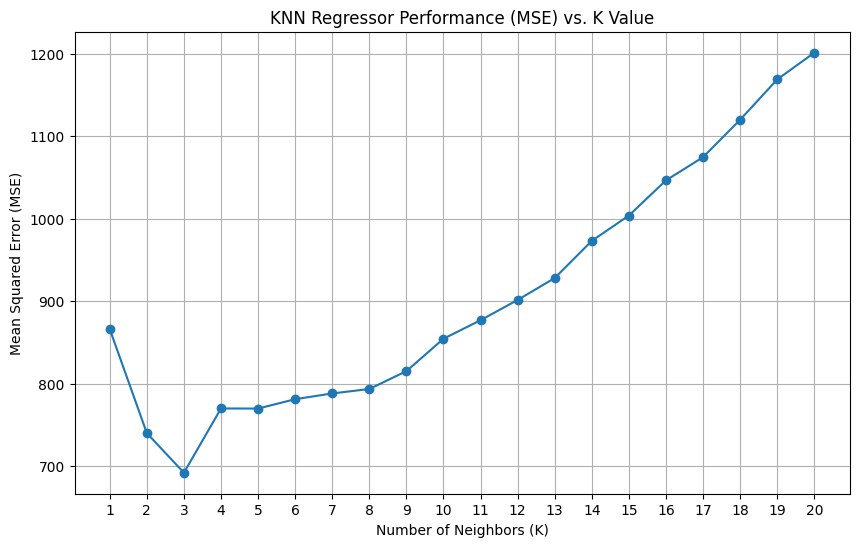

Best K value based on lowest MSE: 3
Lowest MSE: 691.79


In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Analyze the effect of different K values
k_values = range(1, 21) # Test K from 1 to 20
mse_scores = []

for k in k_values:
    # Initialize the KNN regressor
    knn_reg = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn_reg.fit(X_train_reg, y_train_reg)

    # Make predictions on the test set
    y_pred_reg = knn_reg.predict(X_test_reg)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_scores.append(mse)

# Plot the MSE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o')
plt.title('KNN Regressor Performance (MSE) vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the K value with the lowest MSE
best_k_index = mse_scores.index(min(mse_scores))
best_k = k_values[best_k_index]
lowest_mse = mse_scores[best_k_index]

print(f"Best K value based on lowest MSE: {best_k}")
print(f"Lowest MSE: {lowest_mse:.2f}")

13. Implement KNN Imputation for handling missing values in a dataset.

In [14]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Sample dataset with missing values
data = np.array([
    [1, 2, np.nan],
    [4, np.nan, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
])

# Create a KNN imputer object with k=2 neighbors
imputer = KNNImputer(n_neighbors=2)

# Fit the imputer to the data and transform it
imputed_data = imputer.fit_transform(data)

print("Imputed Data:")
print(imputed_data)

# Optionally, standardize the data before imputation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create a KNN imputer object with k=2 neighbors
imputer = KNNImputer(n_neighbors=2)

# Fit the imputer to the scaled data and transform it
imputed_scaled_data = imputer.fit_transform(scaled_data)

# Inverse transform the imputed data to get the original scale
imputed_data = scaler.inverse_transform(imputed_scaled_data)

print("Imputed Data (with scaling):")
print(imputed_data)

Imputed Data:
[[ 1.   2.   7.5]
 [ 4.   5.   6. ]
 [ 7.   8.   9. ]
 [10.  11.  12. ]
 [13.  14.  15. ]]
Imputed Data (with scaling):
[[ 1.   2.   7.5]
 [ 4.   5.   6. ]
 [ 7.   8.   9. ]
 [10.  11.  12. ]
 [13.  14.  15. ]]


14. Train a PCA model and visualize the data projection onto the first two principal components.

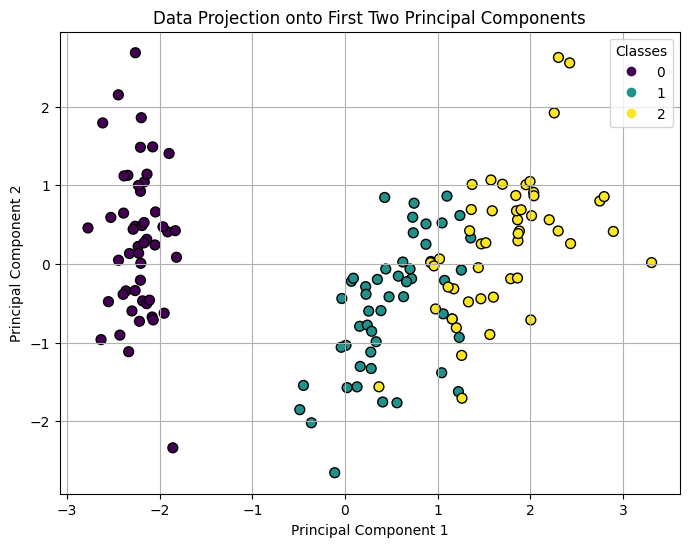

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data projection onto the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('Data Projection onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()

15. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- KNN with KD Tree ---
start_time = time.time()
knn_kdtree = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
y_pred_kdtree = knn_kdtree.predict(X_test)
accuracy_kdtree = accuracy_score(y_test, y_pred_kdtree)
end_time = time.time()
kdtree_time = end_time - start_time

print(f"Model Accuracy (KD Tree): {accuracy_kdtree:.2f}")
print(f"Execution Time (KD Tree): {kdtree_time:.4f} seconds")

# --- KNN with Ball Tree ---
start_time = time.time()
knn_balltree = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
y_pred_balltree = knn_balltree.predict(X_test)
accuracy_balltree = accuracy_score(y_test, y_pred_balltree)
end_time = time.time()
balltree_time = end_time - start_time

print(f"Model Accuracy (Ball Tree): {accuracy_balltree:.2f}")
print(f"Execution Time (Ball Tree): {balltree_time:.4f} seconds")

# Compare performance
print("\nPerformance Comparison:")
print(f"KD Tree Execution Time: {kdtree_time:.4f} seconds")
print(f"Ball Tree Execution Time: {balltree_time:.4f} seconds")

Model Accuracy (KD Tree): 1.00
Execution Time (KD Tree): 0.0079 seconds
Model Accuracy (Ball Tree): 1.00
Execution Time (Ball Tree): 0.0039 seconds

Performance Comparison:
KD Tree Execution Time: 0.0079 seconds
Ball Tree Execution Time: 0.0039 seconds


16. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

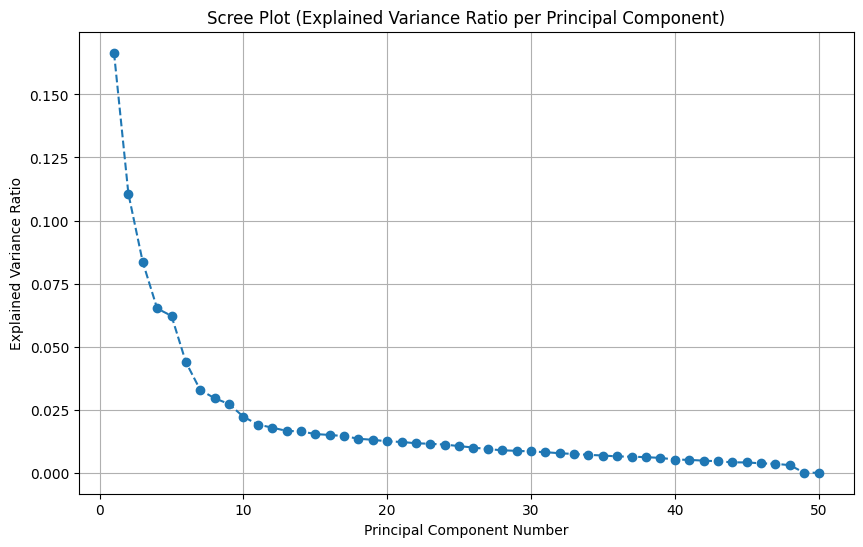

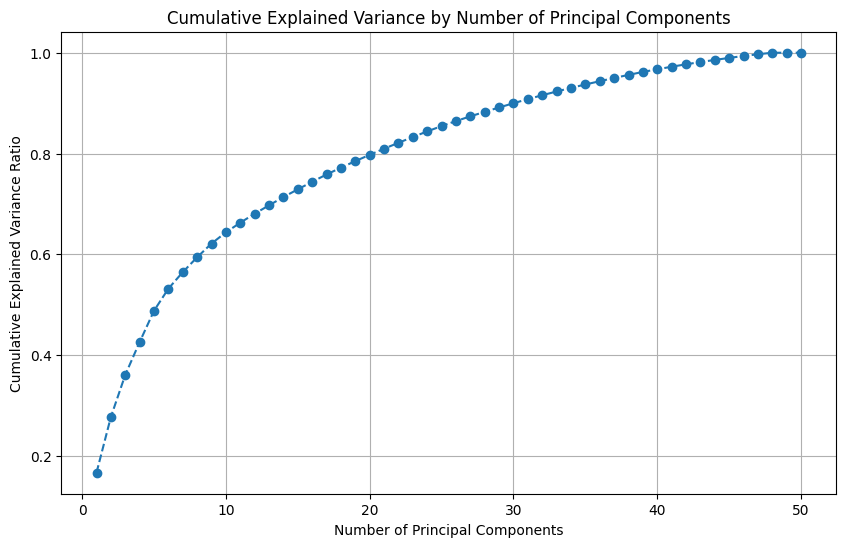

In [17]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate a high-dimensional synthetic dataset
X_high_dim, _ = make_classification(n_samples=200, n_features=50, n_informative=10, random_state=42)

# Initialize PCA
pca = PCA()

# Train PCA model
pca.fit(X_high_dim)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot (Explained Variance Ratio per Principal Component)')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Optional: Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

17. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')      # Use weighted average for multi-class
f1 = f1_score(y_test, y_pred, average='weighted')          # Use weighted average for multi-class


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


18. Train a PCA model and analyze the effect of different numbers of components on accuracy.

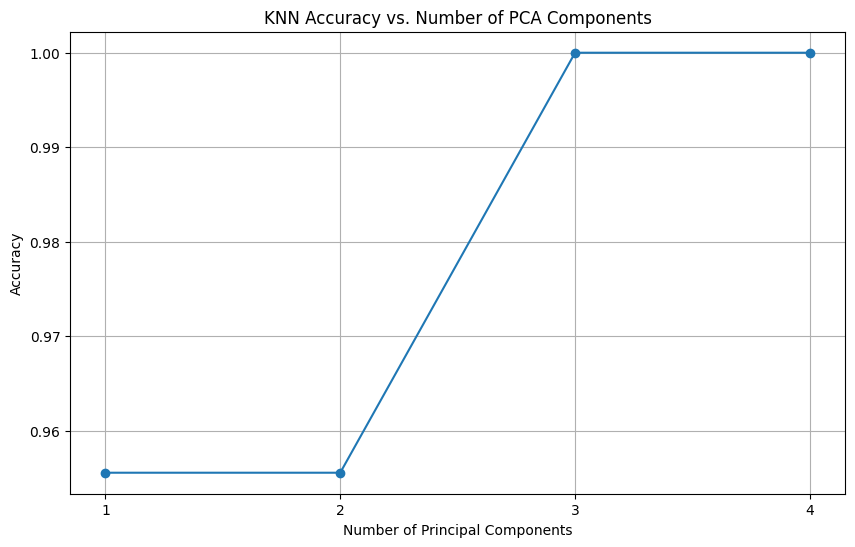

Best number of PCA components based on highest accuracy: 3
Highest Accuracy: 1.00


In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Analyze the effect of different numbers of PCA components on accuracy
n_components_range = range(1, X_train_scaled.shape[1] + 1) # Test from 1 to the total number of features
accuracy_scores = []

for n in n_components_range:
    # Apply PCA with the current number of components
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train a KNN classifier on the PCA-transformed data
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)

    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy vs. number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, accuracy_scores, marker='o')
plt.title('KNN Accuracy vs. Number of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

# Find the number of components with the highest accuracy
best_n_components_index = np.argmax(accuracy_scores)
best_n_components = n_components_range[best_n_components_index]
highest_accuracy = accuracy_scores[best_n_components_index]

print(f"Best number of PCA components based on highest accuracy: {best_n_components}")
print(f"Highest Accuracy: {highest_accuracy:.2f}")

19. Train a KNN Classifier with different leaf_size values and compare accuracy.

Accuracy for different leaf_size values:
Leaf Size: 10, Accuracy: 1.00, Execution Time: 0.0035 seconds
Leaf Size: 30, Accuracy: 1.00, Execution Time: 0.0028 seconds
Leaf Size: 50, Accuracy: 1.00, Execution Time: 0.0026 seconds
Leaf Size: 100, Accuracy: 1.00, Execution Time: 0.0028 seconds


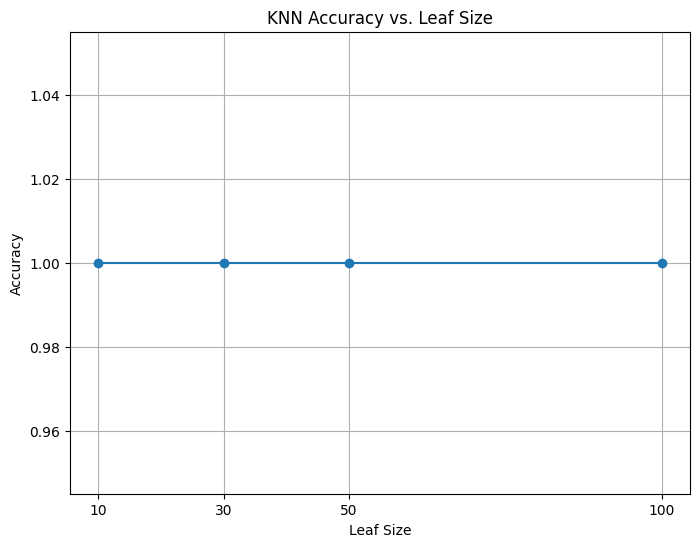

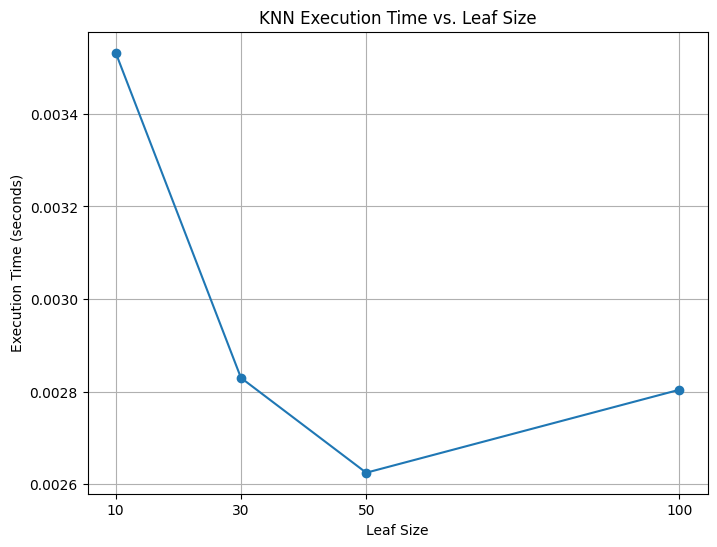

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Analyze the effect of different leaf_size values
leaf_size_values = [10, 30, 50, 100] # Test different leaf_size values
accuracy_scores = []
execution_times = []

for leaf_size in leaf_size_values:
    # Initialize the KNN classifier
    # Note: leaf_size is primarily relevant for 'kd_tree' and 'ball_tree' algorithms
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf_size)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Record execution time
    end_time = time.time()
    execution_times.append(end_time - start_time)


print("Accuracy for different leaf_size values:")
for i, leaf_size in enumerate(leaf_size_values):
    print(f"Leaf Size: {leaf_size}, Accuracy: {accuracy_scores[i]:.2f}, Execution Time: {execution_times[i]:.4f} seconds")

# Optional: Plot accuracy vs. leaf_size
plt.figure(figsize=(8, 6))
plt.plot(leaf_size_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy vs. Leaf Size')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.xticks(leaf_size_values)
plt.grid(True)
plt.show()

# Optional: Plot execution time vs. leaf_size
plt.figure(figsize=(8, 6))
plt.plot(leaf_size_values, execution_times, marker='o')
plt.title('KNN Execution Time vs. Leaf Size')
plt.xlabel('Leaf Size')
plt.ylabel('Execution Time (seconds)')
plt.xticks(leaf_size_values)
plt.grid(True)
plt.show()

20. Train a PCA model and visualize how data points are transformed before and after PCA.

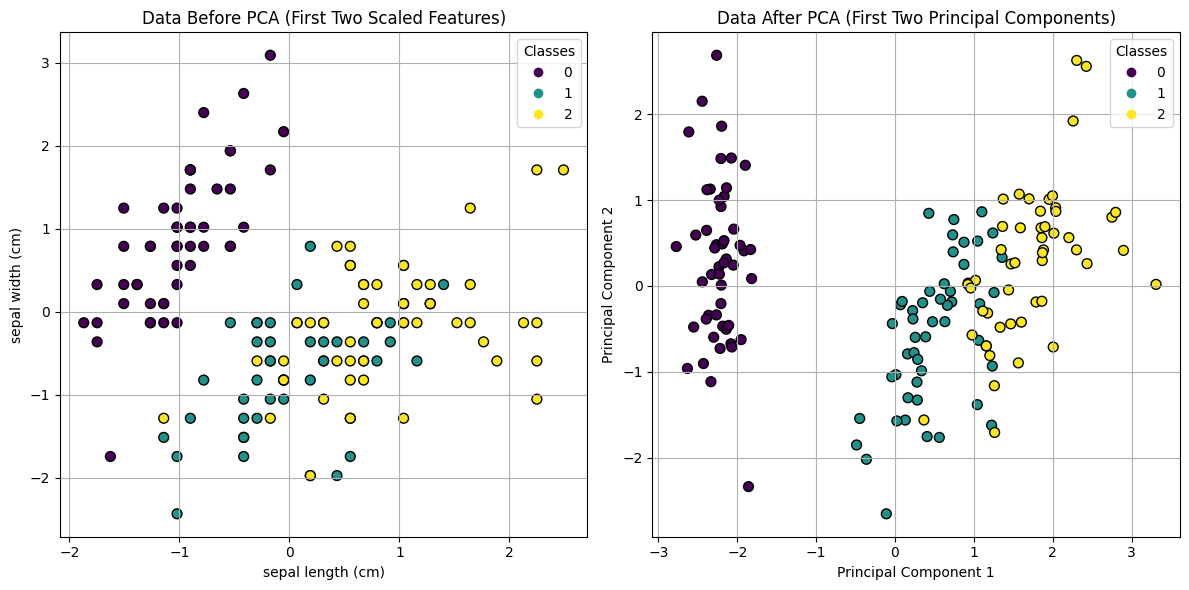

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Visualize data before PCA ---
# For visualization before PCA, we'll plot the first two features as an example
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
scatter_before = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('Data Before PCA (First Two Scaled Features)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(*scatter_before.legend_elements(), title="Classes")
plt.grid(True)

# --- Visualize data after PCA ---
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
scatter_after = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('Data After PCA (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter_after.legend_elements(), title="Classes")
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

21. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



22. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

Mean Squared Error (MSE) for different distance metrics:
Euclidean Distance: 691.79
Manhattan Distance: 691.79
Minkowski Distance: 691.79


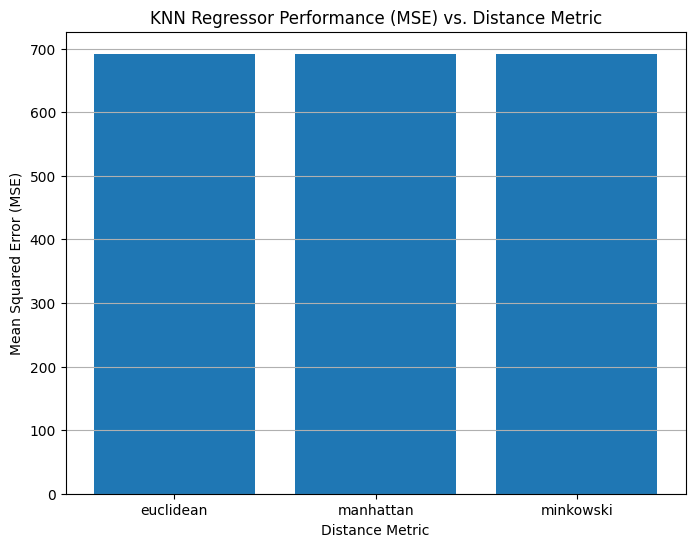

In [23]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Define different distance metrics to compare
metrics = ['euclidean', 'manhattan', 'minkowski']
mse_scores = {}

for metric in metrics:
    # Initialize the KNN regressor with the current metric
    # For minkowski, p=2 is equivalent to euclidean, p=1 is equivalent to manhattan
    if metric == 'minkowski':
        knn_reg = KNeighborsRegressor(n_neighbors=3, metric=metric, p=2) # Default p=2 for minkowski
    else:
        knn_reg = KNeighborsRegressor(n_neighbors=3, metric=metric)

    # Train the model
    knn_reg.fit(X_train_reg, y_train_reg)

    # Make predictions on the test set
    y_pred_reg = knn_reg.predict(X_test_reg)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_scores[metric] = mse

# Print the MSE for each distance metric
print("Mean Squared Error (MSE) for different distance metrics:")
for metric, mse in mse_scores.items():
    print(f"{metric.capitalize()} Distance: {mse:.2f}")

# Optional: Plot the MSE for different metrics
plt.figure(figsize=(8, 6))
plt.bar(mse_scores.keys(), mse_scores.values())
plt.title('KNN Regressor Performance (MSE) vs. Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(axis='y')
plt.show()

23.  Train a KNN Classifier and evaluate using ROC-AUC score.

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
# Use a smaller number of neighbors for potentially more varied probabilities
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make probability predictions on the test set
# ROC-AUC requires probability estimates
y_prob = knn.predict_proba(X_test)

# For multi-class classification, we need to calculate AUC for each class
# using a one-vs-rest (OvR) approach and then average them.
# Binarize the output labels for OvR
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Calculate ROC-AUC score (weighted average for multi-class)
roc_auc = roc_auc_score(y_test_binarized, y_prob, average='weighted')

print(f"ROC-AUC Score (weighted): {roc_auc:.2f}")

# You can also calculate AUC for each class individually
# print("\nROC-AUC per class:")
# for i in range(y_prob.shape[1]):
#     roc_auc_class = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
#     print(f"Class {i} ({iris.target_names[i]}): {roc_auc_class:.2f}")

ROC-AUC Score (weighted): 1.00


24. Train a PCA model and visualize the variance captured by each principal component.

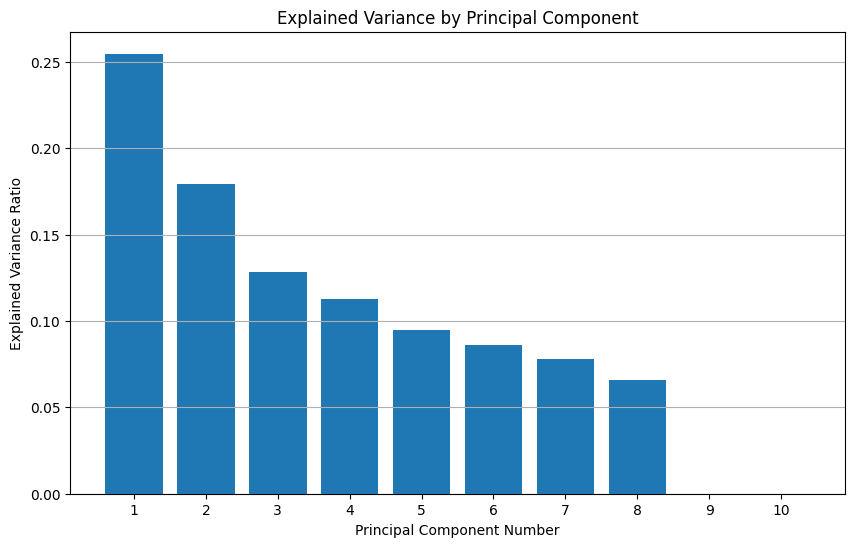

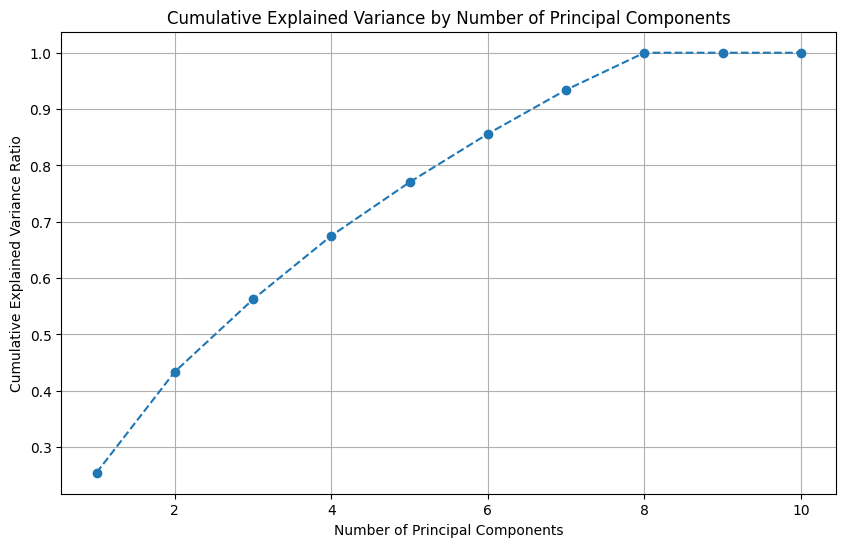

In [25]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X_synth, _ = make_classification(n_samples=200, n_features=10, random_state=42)

# Initialize PCA
pca = PCA()

# Train PCA model
pca.fit(X_synth)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance captured by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y')
plt.show()

# Optional: Visualize cumulative explained variance (Scree plot)
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

25. Train a KNN Classifier and perform feature selection before training.

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data before feature selection (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Feature Selection using SelectKBest
# Select the top 2 features based on the F-statistic (for classification)
selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of features after selection: {X_train_selected.shape[1]}")

# Initialize the KNN classifier on the selected features
knn_selected = KNeighborsClassifier(n_neighbors=3)

# Train the model on the selected features
knn_selected.fit(X_train_selected, y_train)

# Make predictions on the test set with selected features
y_pred_selected = knn_selected.predict(X_test_selected)

# Calculate and print the accuracy with feature selection
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Model Accuracy (with Feature Selection): {accuracy_selected:.2f}")

# For comparison, train KNN on the original scaled data as well
knn_original_scaled = KNeighborsClassifier(n_neighbors=3)
knn_original_scaled.fit(X_train_scaled, y_train)
y_pred_original_scaled = knn_original_scaled.predict(X_test_scaled)
accuracy_original_scaled = accuracy_score(y_test, y_pred_original_scaled)
print(f"Model Accuracy (Original Scaled Data): {accuracy_original_scaled:.2f}")

Original number of features: 4
Number of features after selection: 2
Model Accuracy (with Feature Selection): 1.00
Model Accuracy (Original Scaled Data): 1.00


26. Train a PCA model and visualize the data reconstruction error after reducing dimensions.

Original number of features: 4
Number of components used for PCA: 2
Reconstruction Error (MSE): 0.0419


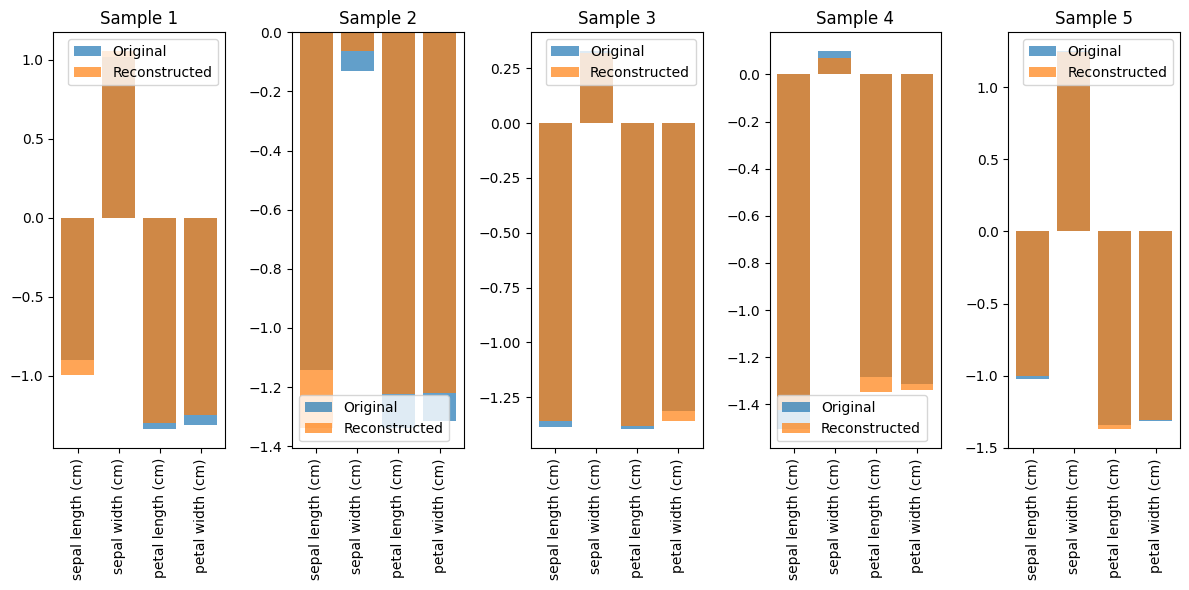

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose a number of components less than the original number of features
n_components = 2 # For example, reduce to 2 components

# Initialize PCA with the chosen number of components
pca = PCA(n_components=n_components)

# Train PCA model and transform the data
X_pca = pca.fit_transform(X_scaled)

# Reconstruct the data from the PCA-transformed data
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate the reconstruction error (e.g., Mean Squared Error)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)

print(f"Original number of features: {X.shape[1]}")
print(f"Number of components used for PCA: {n_components}")
print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")

# Optional: Visualize original vs. reconstructed data for a few samples
# This is more illustrative for lower dimensional original data
if X.shape[1] <= 4: # Only visualize if original features are not too many
    n_samples_to_visualize = 5
    feature_names = iris.feature_names if hasattr(iris, 'feature_names') else [f'Feature {i+1}' for i in range(X.shape[1])]

    plt.figure(figsize=(12, 6))
    for i in range(n_samples_to_visualize):
        plt.subplot(1, n_samples_to_visualize, i + 1)
        plt.bar(feature_names, X_scaled[i], alpha=0.7, label='Original')
        plt.bar(feature_names, X_reconstructed[i], alpha=0.7, label='Reconstructed')
        plt.title(f'Sample {i+1}')
        plt.xticks(rotation=90)
        plt.legend()
    plt.tight_layout()
    plt.show()

27.  Train a KNN Classifier and visualize the decision boundary.

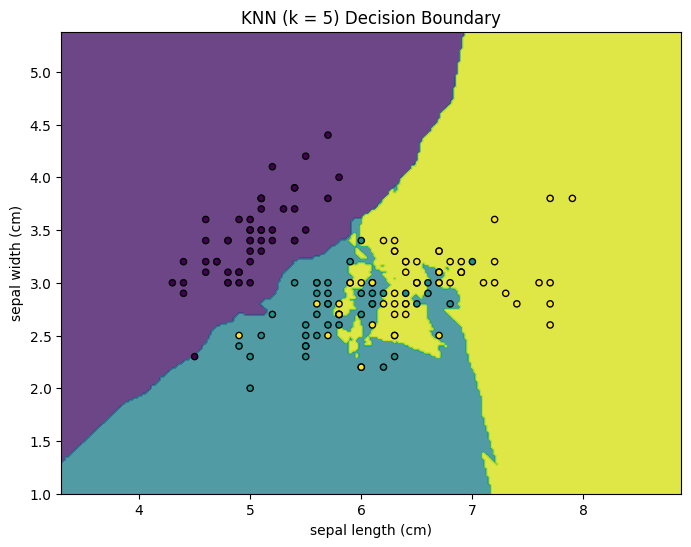

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset and select the first two features for simplicity
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Split the dataset into training and testing sets (optional for visualization, but good practice)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
# Using a specific K value, e.g., 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the entire dataset for visualization purposes
knn.fit(X, y)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
plt.title(f"KNN (k = {knn.n_neighbors}) Decision Boundary")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

28.  Train a PCA model and analyze the effect of different numbers of components on data variance.

Total Explained Variance by Number of Components:
Number of Components: 1, Total Explained Variance: 0.2547
Number of Components: 2, Total Explained Variance: 0.4339
Number of Components: 3, Total Explained Variance: 0.5624
Number of Components: 4, Total Explained Variance: 0.6753
Number of Components: 5, Total Explained Variance: 0.7703
Number of Components: 6, Total Explained Variance: 0.8561
Number of Components: 7, Total Explained Variance: 0.9342
Number of Components: 8, Total Explained Variance: 1.0000
Number of Components: 9, Total Explained Variance: 1.0000
Number of Components: 10, Total Explained Variance: 1.0000


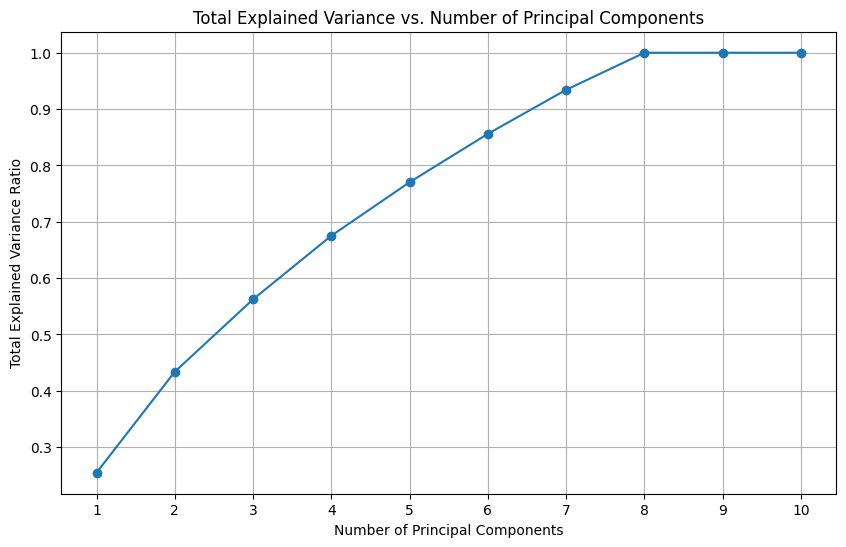

In [29]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X_synth, _ = make_classification(n_samples=200, n_features=10, random_state=42)

# Analyze the effect of different numbers of components on explained variance
n_components_range = range(1, X_synth.shape[1] + 1) # Test from 1 to the total number of features
explained_variance = []
cumulative_variance = []

for n in n_components_range:
    # Initialize PCA with the current number of components
    pca = PCA(n_components=n)

    # Train PCA model and transform the data
    pca.fit(X_synth)

    # Store explained variance and cumulative explained variance
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_)) # cumulative for this n

# Print or plot the results
print("Total Explained Variance by Number of Components:")
for n, variance in zip(n_components_range, explained_variance):
    print(f"Number of Components: {n}, Total Explained Variance: {variance:.4f}")

# Visualize the total explained variance
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance, marker='o')
plt.title('Total Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Explained Variance Ratio')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

# Note: This plot will show the cumulative explained variance since pca.explained_variance_ratio_
# for n_components=n already sums up the variance for the first n components.